In [1]:
%matplotlib inline
import pandas as pd, numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob

In [2]:
data_de = pd.read_csv("DEvideos.csv")

Arrange the columns "trending_date" and "publish_time" as per the Unix date-time format

In [3]:
data_de["trending_date"] = pd.to_datetime(data_de["trending_date"], format="%y.%d.%m")
data_de["publish_time"] = pd.to_datetime(data_de["publish_time"], format="%Y-%m-%dT%H:%M:%S.%fZ")

In [4]:
data_de.insert(5, "publish_date", data_de["publish_time"].dt.date)
data_de["publish_time"] = data_de["publish_time"].dt.time
data_de["publish_date"]=pd.to_datetime(data_de["publish_date"])

In [5]:
data_de.head(2)

,video_id,trending_date,title,channel_title,category_id,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,LgVi6y5QIjM,2017-11-14,Sing zu Ende! | Gesangseinlagen vom Feinsten |...,inscope21,24,2017-11-13,17:08:49,"inscope21|""sing zu ende""|""gesangseinlagen""|""ge...",252786,35885,230,1539,https://i.ytimg.com/vi/LgVi6y5QIjM/default.jpg,False,False,False,Heute gibt es mal wieder ein neues Format... w...
1,Bayt7uQith4,2017-11-14,Kinder ferngesteuert im Kiosk! Erwachsene abzo...,LUKE! Die Woche und ich,23,2017-11-12,22:30:01,"Kinder|""ferngesteuert""|""Kinder ferngesteuert""|...",797196,53576,302,1278,https://i.ytimg.com/vi/Bayt7uQith4/default.jpg,False,False,False,Kinder ferngesteuert! Kinder lassen sich sooo ...


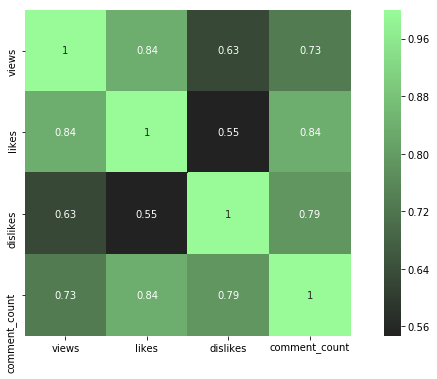

In [6]:
# take a glance at the correlation between views, likes, dislikes and comment_count using correlation matrix
columns = ["views", "likes", "dislikes", "comment_count"]
fig, ax = plt.subplots(figsize=(12, 6))
corr = data_de[columns].corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.dark_palette("palegreen", as_cmap=True),
            square=True, ax=ax, annot=True)
plt.show()

#### Observation as per the above matrix

We can see

* high correlation between "views and likes" and "comment_count and dislikes" 
* medium correlation between "views and dislikes", "views and comment_count" and "likes and comment_count"
* low correlation between "likes and dislikes"

Since, a video could be trending for several days, there might be multiple rows of a particular video. So, for that we will calculate total views, comments, likes and dislikes of a video using groupby(). 

In [7]:
views=data_de.groupby(["video_id"])["views"].agg("sum")
likes=data_de.groupby(["video_id"])["likes"].agg("sum")
dislikes=data_de.groupby(["video_id"])["dislikes"].agg("sum")
comment_count=data_de.groupby(["video_id"])["comment_count"].agg("sum")

Remove the duplicates to get the correct number of videos on comments_disabled/ rating_disabled/video_error

In [8]:
single_day_trend=data_de.drop_duplicates(subset="video_id", keep=False, inplace=False)
multiple_day_trend= data_de.drop_duplicates(subset="video_id",keep="first",inplace=False)

In [9]:
frames = [single_day_trend, multiple_day_trend]
without_duplicates=pd.concat(frames)

In [10]:
comment_disabled = without_duplicates[without_duplicates["comments_disabled"] == True].describe()
rating_disabled = without_duplicates[without_duplicates["ratings_disabled"] == True].describe()
video_error_or_removed = without_duplicates[without_duplicates["video_error_or_removed"] == True].describe()

In [11]:
# check the number of videos that trended only for a single day
single_day_trend.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
6,EIM7RMe39JY,2017-11-14,Kanaken auf der Klassenfahrt,Bodyformus,23,2017-11-13,11:59:04,"kanaken|""kurden""|""türken""|""schule""|""schulzeit""...",308683,35704,578,1398,https://i.ytimg.com/vi/EIM7RMe39JY/default.jpg,False,False,False,Video mit Planet Kanax: https://youtu.be/3U51c...
9,aZYSFByDGkg,2017-11-14,Legenden: So wird dein Ruhm unsterblich - Fame...,WALULIS,1,2017-11-13,15:06:12,"michael jackson|""promi""|""tot""|""tod""|""gestorben...",62418,4749,44,425,https://i.ytimg.com/vi/aZYSFByDGkg/default.jpg,False,False,False,"Berühmt werden kann jeder, aber berühmt bleibe..."
10,2hu_evXPpMM,2017-11-14,Dagi Bee wird Heiraten | Coldmirror bekommt Eh...,HerrNewstime,24,2017-11-12,16:33:18,"Dagi Bee|""Heiraten""|""Coldmirror""|""YouTube""|""Tr...",228574,11349,990,1049,https://i.ytimg.com/vi/2hu_evXPpMM/default.jpg,False,False,False,Dagi Bee wird Heiraten | Coldmirror bekommt Eh...


In [12]:
# check the number of videos that trended for more than one day
multiple_day_trend.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,LgVi6y5QIjM,2017-11-14,Sing zu Ende! | Gesangseinlagen vom Feinsten |...,inscope21,24,2017-11-13,17:08:49,"inscope21|""sing zu ende""|""gesangseinlagen""|""ge...",252786,35885,230,1539,https://i.ytimg.com/vi/LgVi6y5QIjM/default.jpg,False,False,False,Heute gibt es mal wieder ein neues Format... w...
1,Bayt7uQith4,2017-11-14,Kinder ferngesteuert im Kiosk! Erwachsene abzo...,LUKE! Die Woche und ich,23,2017-11-12,22:30:01,"Kinder|""ferngesteuert""|""Kinder ferngesteuert""|...",797196,53576,302,1278,https://i.ytimg.com/vi/Bayt7uQith4/default.jpg,False,False,False,Kinder ferngesteuert! Kinder lassen sich sooo ...
2,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13,07:30:00,"last week tonight trump presidency|""last week ...",2418783,97190,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."


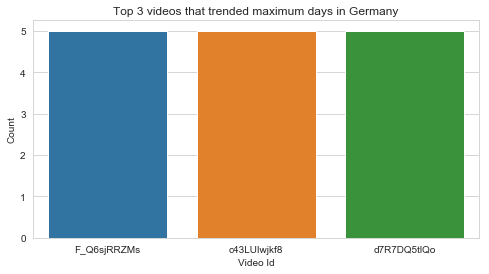

In [13]:
# check the videos that trended on maximum days and their title, likes, dislikes, comments, and views
max_days_trend_video = data_de.groupby(by=["video_id"],as_index=False).count().sort_values(by="title",ascending=False).head(3)

plt.figure(figsize=(8,4))
sns.set_style("whitegrid")
ax = sns.barplot(x=max_days_trend_video["video_id"],y=max_days_trend_video["trending_date"], data=max_days_trend_video)
plt.xlabel("Video Id")
plt.ylabel("Count")
plt.title("Top 3 videos that trended maximum days in Germany")

plt.show()

#### Top 3 trending channels in Germany

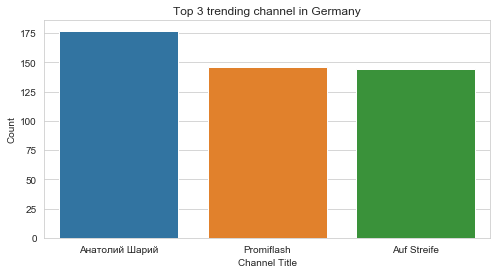

In [14]:
trending_channel = without_duplicates.groupby(by=["channel_title"],as_index=False).count().sort_values(by="title",ascending=False).head(3)

plt.figure(figsize=(8,4))
sns.set_style("whitegrid")
ax = sns.barplot(x=trending_channel["channel_title"],y=trending_channel["video_id"], data=trending_channel)
plt.xlabel("Channel Title")
plt.ylabel("Count")
plt.title("Top 3 trending channel in Germany")

plt.show()

In [15]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS

def wc(data,bgcolor,title):
    plt.figure(figsize = (100,100))
    wc = WordCloud(background_color = bgcolor, max_words = 1000,  max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis("off")

#### Count the frequency of words in the title column

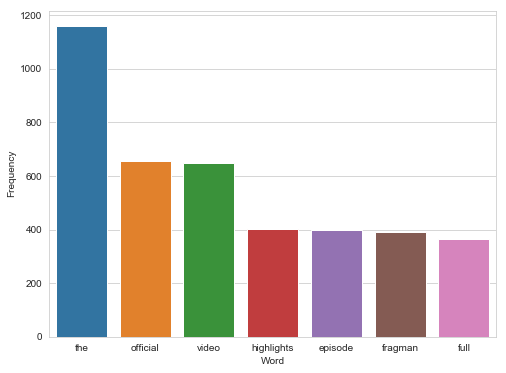

In [16]:
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
import re

top_N = 100

title_lower = data_de["title"].str.lower().str.cat(sep=" ")

# removes punctuation,numbers and returns list of words
remove_punc_title = re.sub("[^A-Za-z]+", " ", title_lower)

# remove all the stopwords from the text
stop_words = list(get_stop_words("de"))         
nltk_words = list(stopwords.words("german"))   
stop_words.extend(nltk_words)

word_tokens = word_tokenize(remove_punc_title)
filtered_sentence = [w for w in word_tokens if not w in stop_words]
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

# remove characters which have length less than 2  
without_single_char = [word for word in filtered_sentence if len(word) > 2]

# remove numbers
cleaned_data_title = [word for word in without_single_char if not word.isnumeric()]        

# calculate frequency distribution
word_dist = nltk.FreqDist(cleaned_data_title)
result = pd.DataFrame(word_dist.most_common(top_N),
                    columns=["Word", "Frequency"])

plt.figure(figsize=(8,6))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=result.head(7))

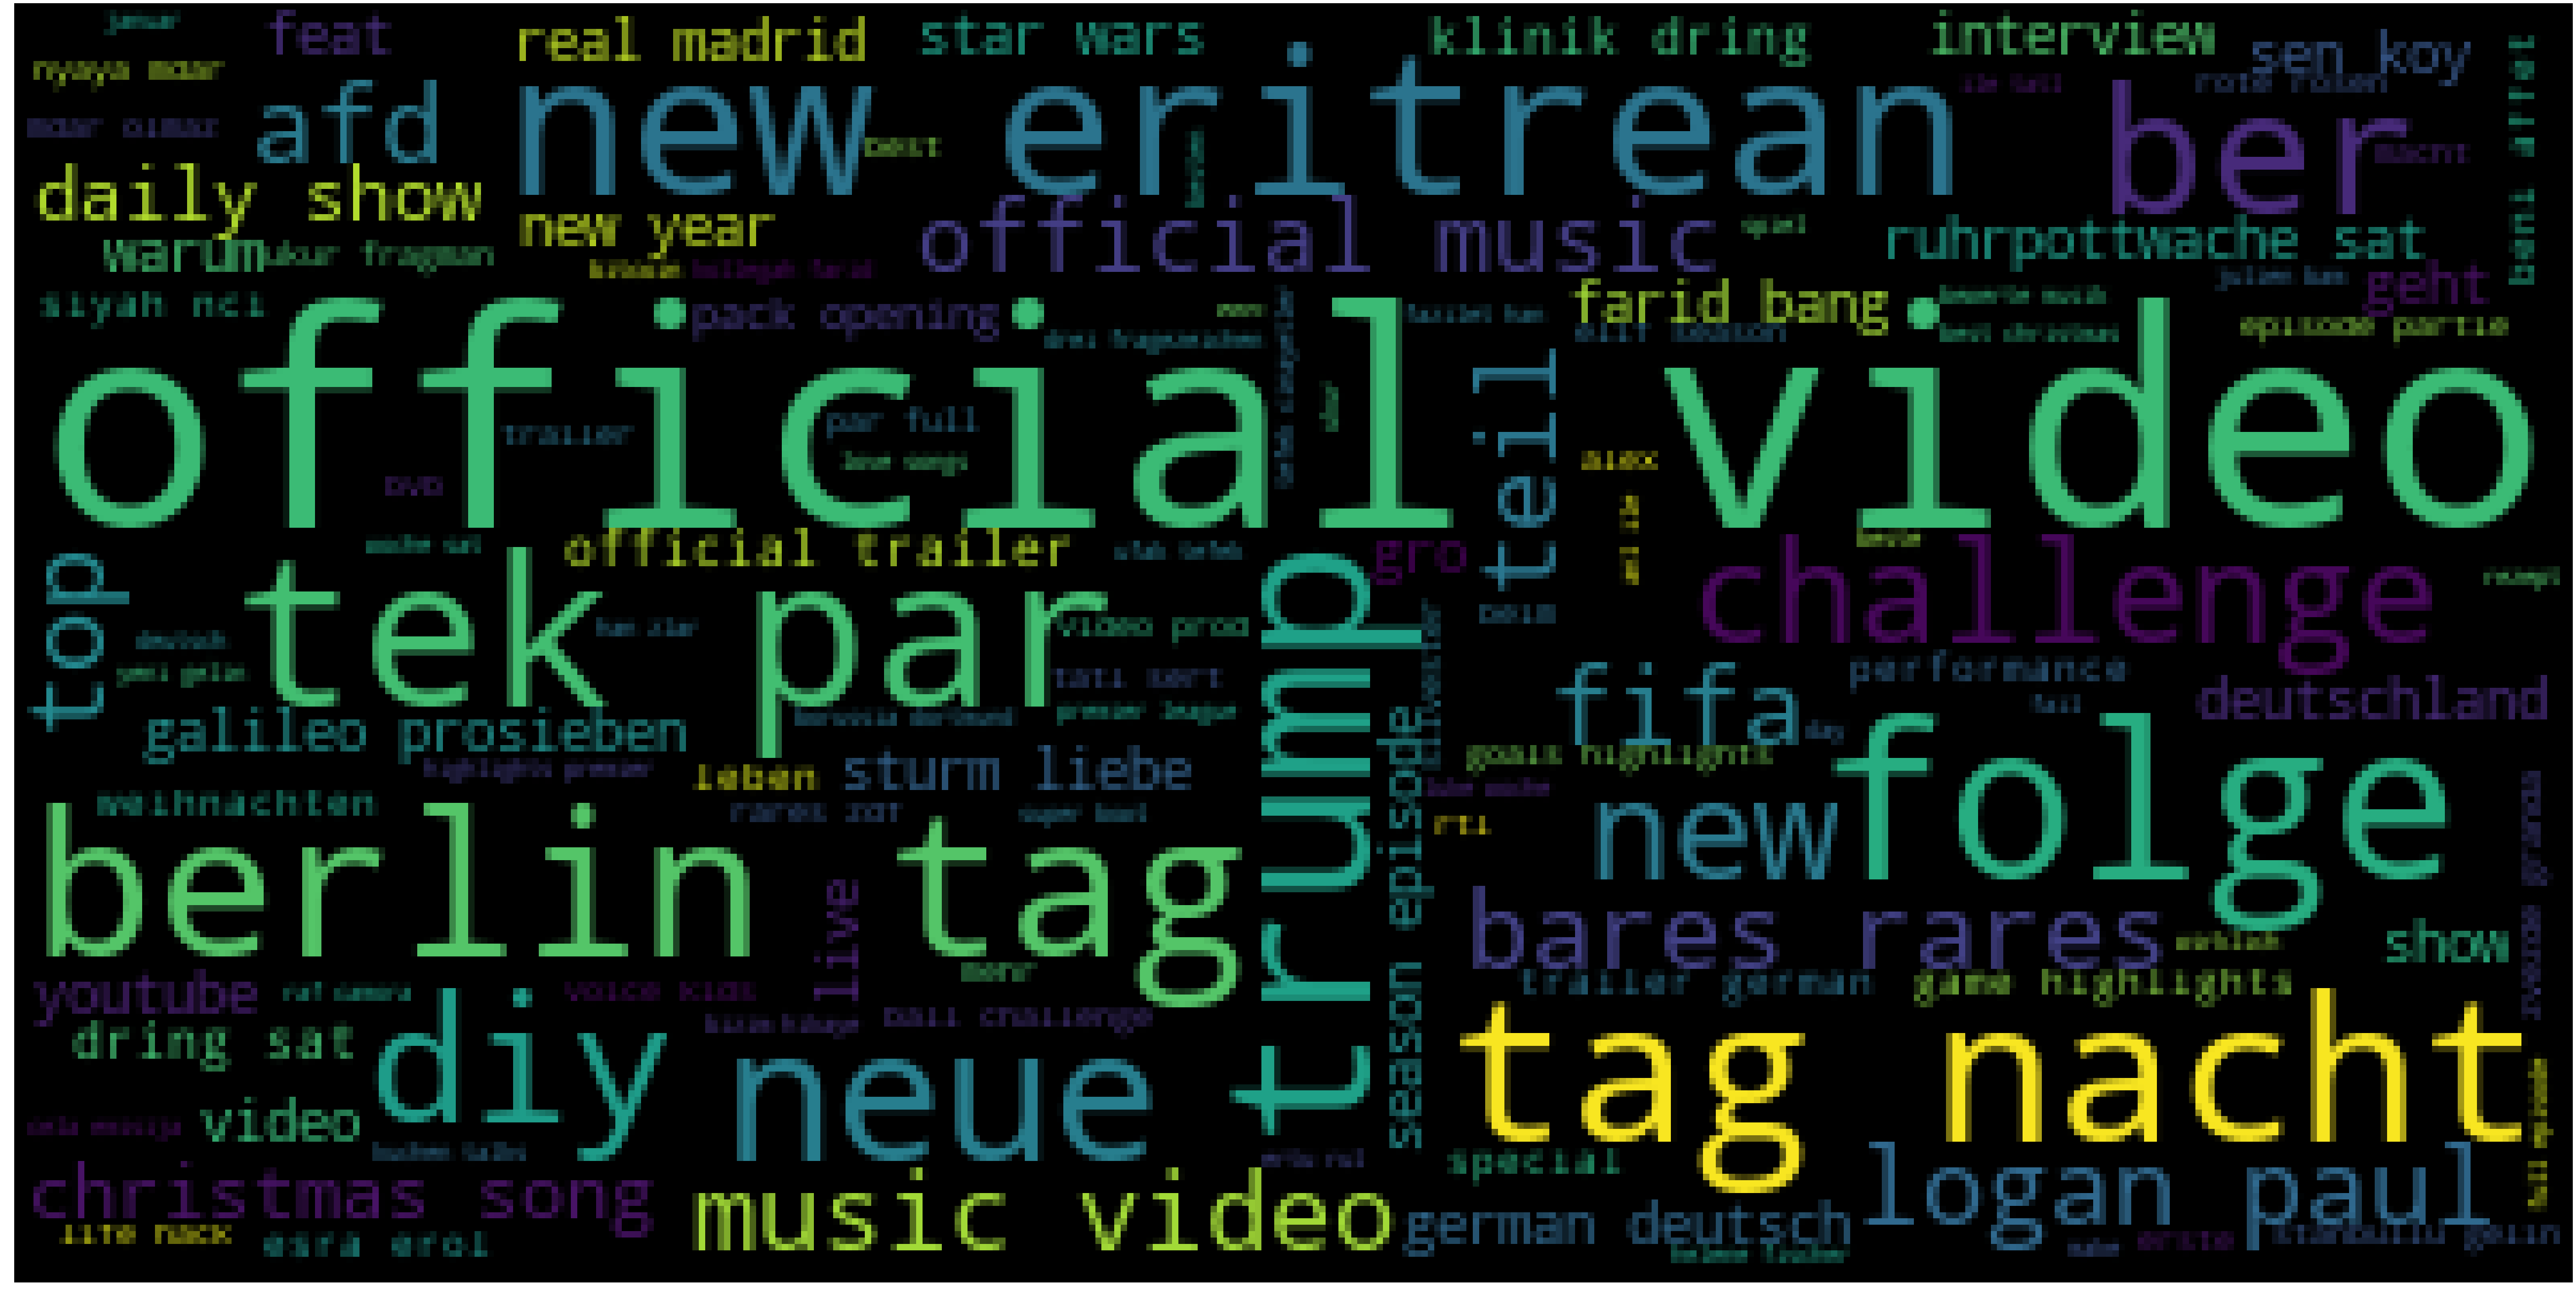

In [17]:
# wordcloud for the title column
wc(cleaned_data_title,"black","Common Words" )

#### Count the frequency of words in tags column

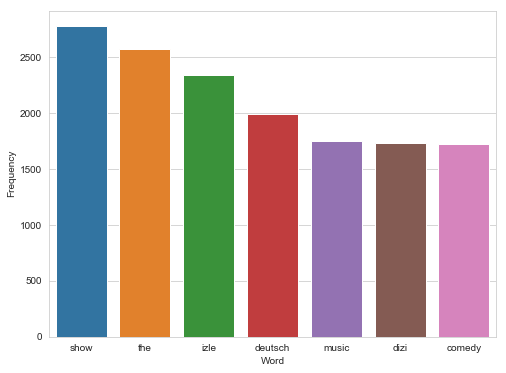

In [18]:
top_N = 100

tags_lower = data_de["tags"].str.lower().str.cat(sep=' ')

# removes punctuation,numbers and returns list of words
remove_punc_tags = re.sub("[^A-Za-z]+", " ", tags_lower)

#remove all the stopwords from the text
stop_words = list(get_stop_words("de"))         
nltk_words = list(stopwords.words("german"))   
stop_words.extend(nltk_words)

word_tokens_tags = word_tokenize(remove_punc_tags)
filtered_sentence_tags = [wrd_tags for wrd_tags in word_tokens_tags if not wrd_tags in stop_words]
filtered_sentence_tags = []
for wrd_tags in word_tokens_tags:
    if wrd_tags not in stop_words:
        filtered_sentence_tags.append(wrd_tags)

# remove characters which have length less than 2  
without_single_char_tags = [word_tags for word_tags in filtered_sentence_tags if len(word_tags) > 2]

# remove numbers
cleaned_data_tags = [word_tags for word_tags in without_single_char_tags if not word_tags.isnumeric()]        

# calculate frequency distribution
word_dist_tags = nltk.FreqDist(cleaned_data_tags)
result_tags = pd.DataFrame(word_dist_tags.most_common(top_N),
                    columns=["Word", "Frequency"])

plt.figure(figsize=(8,6))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=result_tags.head(7))

#### worlcloud for tags

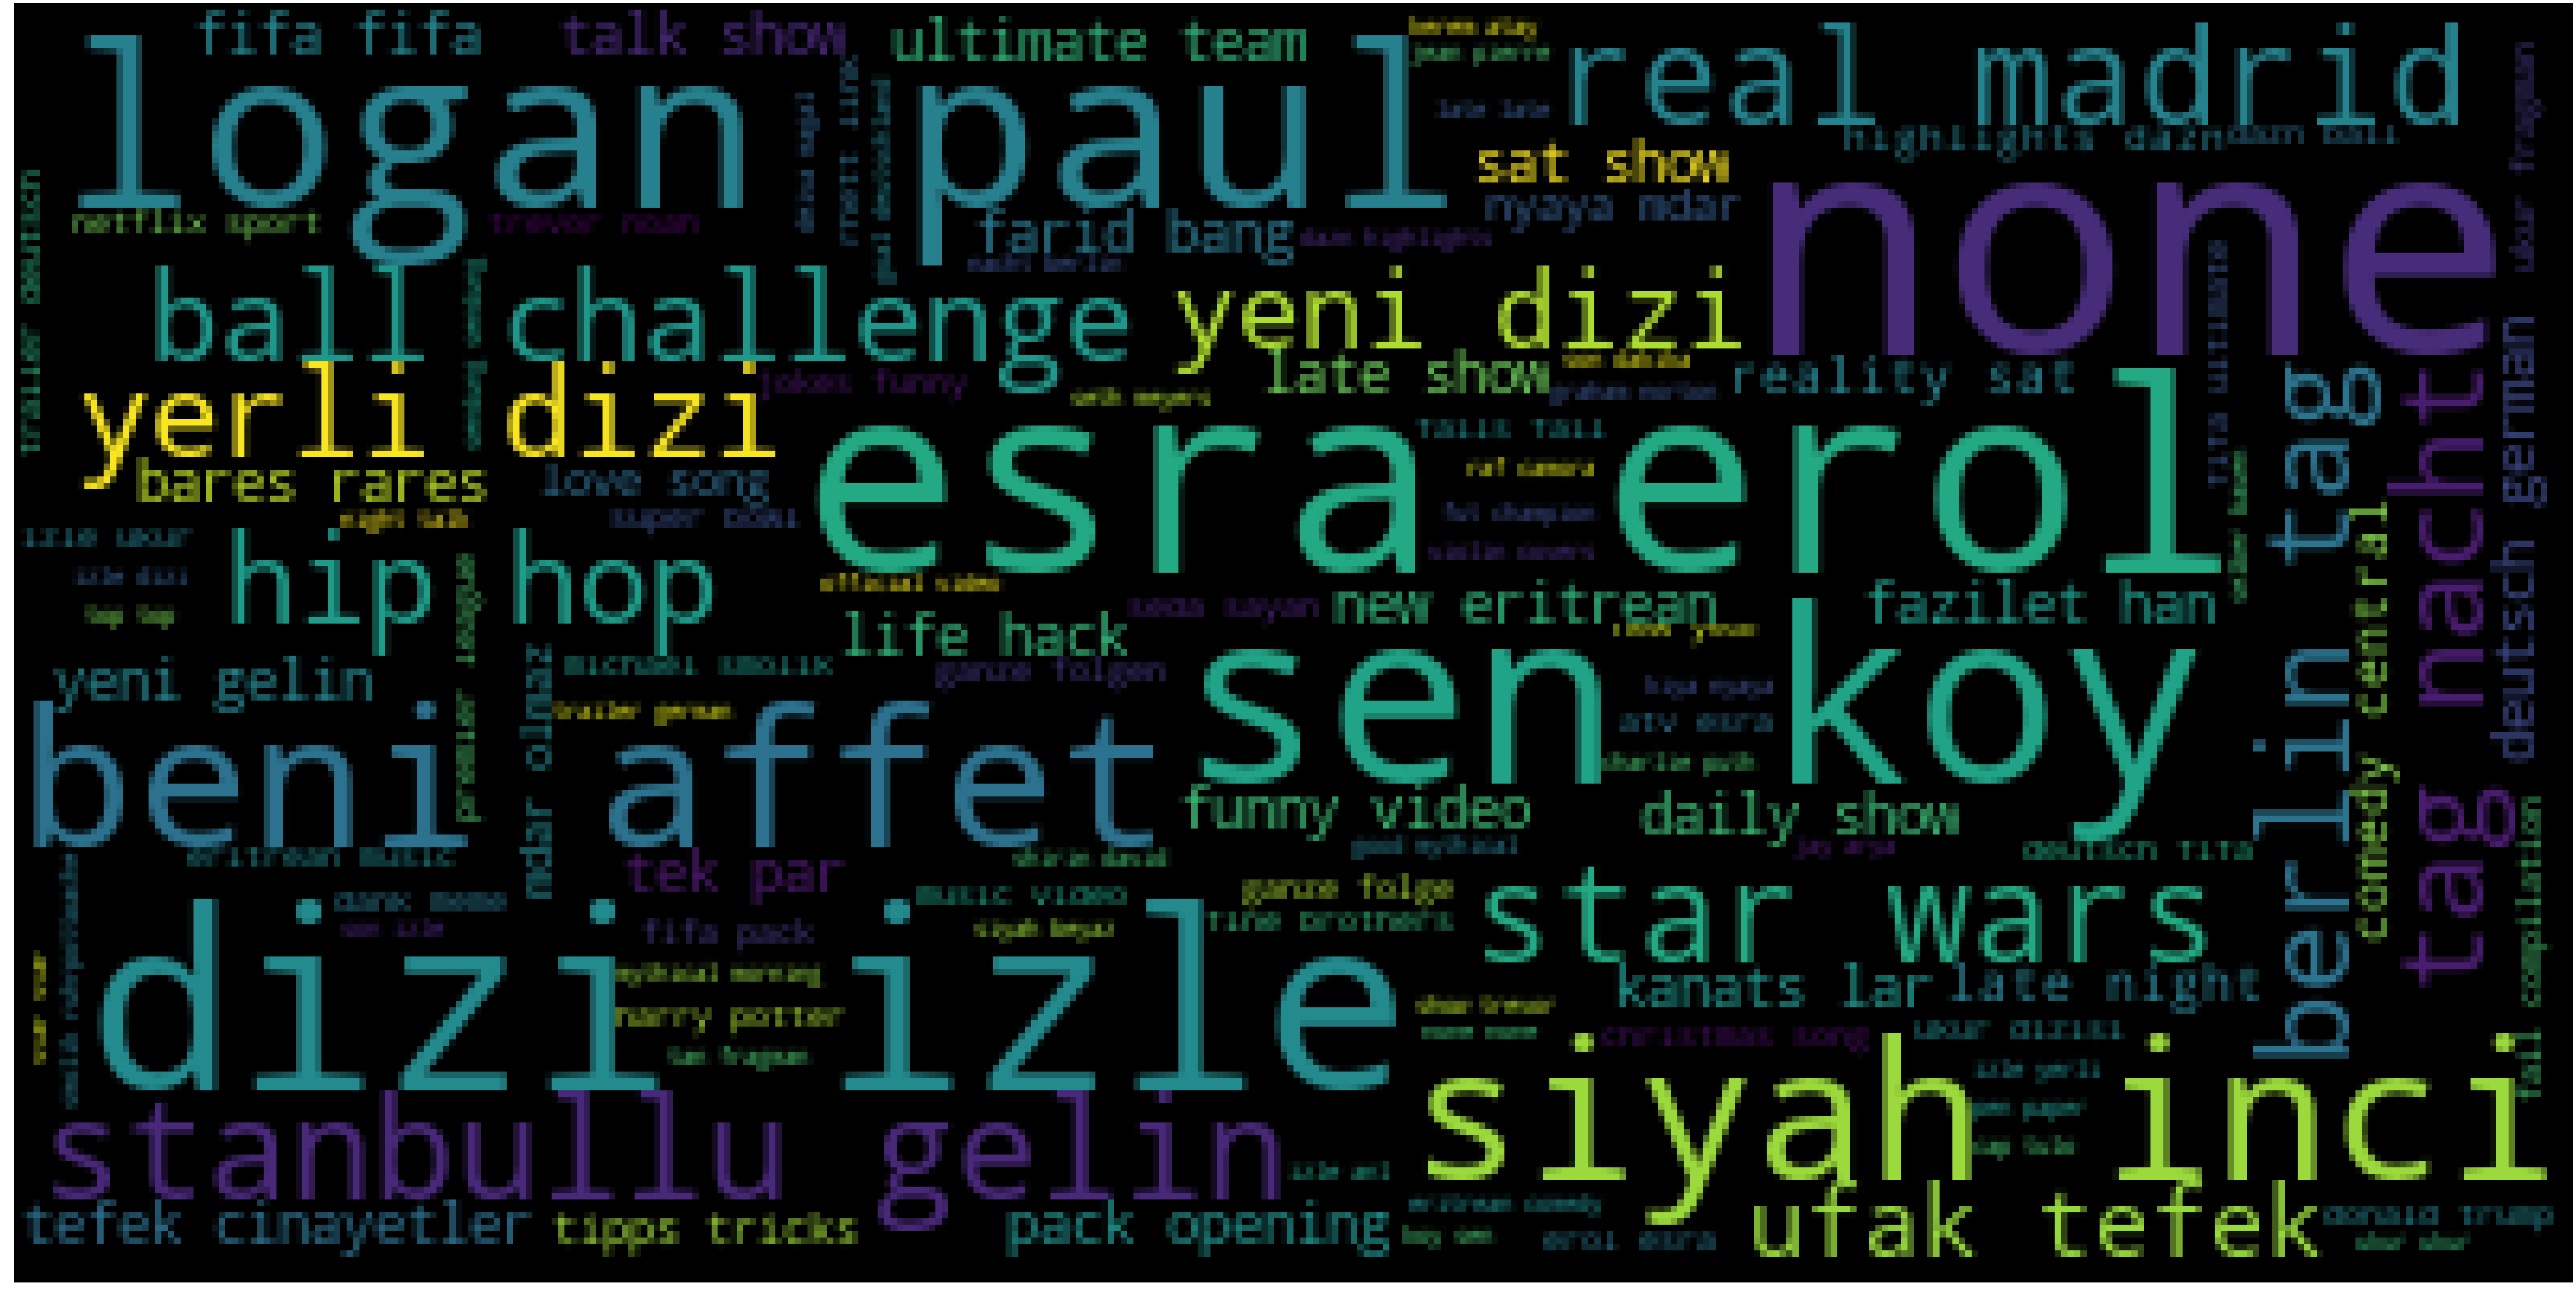

In [19]:
wc(cleaned_data_tags,"black","Common Words")

#### Classify tags coulmn into positive and negative sentiments 

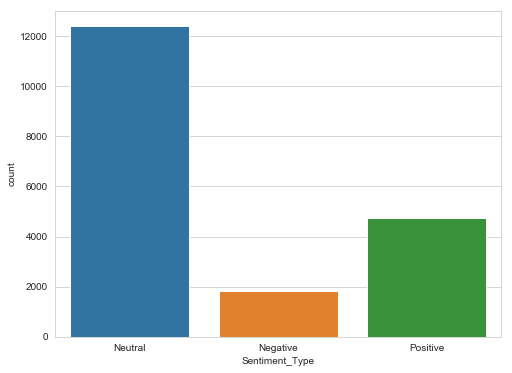

In [20]:
bloblist_desc = list()

data_de_descr_str=data_de["tags"].astype(str)
for row in data_de_descr_str:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    data_de_polarity_desc = pd.DataFrame(bloblist_desc, columns = ["sentence","sentiment","polarity"])

    def f(data_de_polarity_desc):
        if data_de_polarity_desc["sentiment"] > 0:
            val = "Positive"
        elif data_de_polarity_desc["sentiment"] == 0:
            val = "Neutral"
        else:
            val = "Negative"
        return val

data_de_polarity_desc["Sentiment_Type"] = data_de_polarity_desc.apply(f, axis=1)

plt.figure(figsize=(8,6))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=data_de_polarity_desc)

#### Classify title coulmn into positive and negative sentiments 

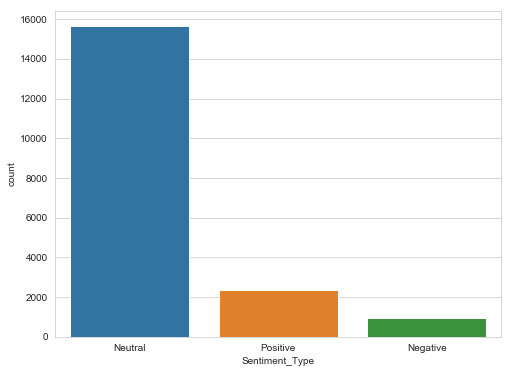

In [21]:
bloblist_desc = list()

data_de_descr_str=data_de["title"].astype(str)
for row in data_de_descr_str:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    data_de_polarity_desc = pd.DataFrame(bloblist_desc, columns = ["sentence","sentiment","polarity"])

    def f(data_de_polarity_desc):
        if data_de_polarity_desc["sentiment"] > 0:
            val = "Positive"
        elif data_de_polarity_desc["sentiment"] == 0:
            val = "Neutral"
        else:
            val = "Negative"
        return val

data_de_polarity_desc["Sentiment_Type"] = data_de_polarity_desc.apply(f, axis=1)

plt.figure(figsize=(8,6))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=data_de_polarity_desc)